<a href="https://colab.research.google.com/github/phra35/Ebola/blob/master/poverty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret



     |████████████████████████████████| 194kB 3.5MB/s 
     |████████████████████████████████| 389kB 10.8MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
     |████████████████████████████████| 7.0MB 10.5MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 63.9MB 45kB/s 
     |████████████████████████████████| 133kB 37.9MB/s 
     |████████████████████████████████| 3.2MB 38.5MB/s 
     |████████████████████████████████| 1.6MB 39.7MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 1.2MB 35.9MB/s 
     |████████████████████████████████| 266kB 39.9MB/s 
     |████████████████████████████████| 2.1MB 37.2MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 604kB 37.5MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 6.3MB 34.9MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving mw_hhold.csv to mw_hhold.csv


In [ ]:

import pandas as pd
import io
from google.colab import files 
uploaded = files.upload()
mw_hh1 = pd.read_csv(io.StringIO(uploaded['mw_hhold.csv'].decode('utf-8')))


Saving mw_hhold.csv to mw_hhold (1).csv


In [ ]:
import sklearn

In [ ]:
mw_hh1 = pd.read_csv(io.StringIO(uploaded['mw_hhold.csv'].decode('utf-8')))

In [ ]:
mw_hh1.shape

(12244, 486)

In [ ]:
mw_hh1.head()

,wta_hh,wta_pop,der_hhsize,poor,hld_rooms,hld_nbcellpho,hld_selfscale,der_nchild10under,der_nmalesover10,der_nfemalesover10,der_nliterate,hld_dwelloccu__Employer provides,"hld_dwelloccu__Free, authorised","hld_dwelloccu__Free, not authorised",hld_dwelloccu__Owned,hld_dwelloccu__Rented,hld_dwelltype__Semi-Permanent,hld_dwelltype__Traditional,hld_walls__Compacted earth,hld_walls__Concrete,hld_walls__Grass,hld_walls__Iron sheets,hld_walls__Mud,hld_walls__Mud brick,hld_walls__Other (specify),hld_walls__Wood,hld_roof__Concrete,hld_roof__Grass,hld_roof__Iron sheets,hld_roof__Other (specify),hld_roof__Plastic sheeting,hld_floor__Sand,hld_floor__Smooth cement,hld_floor__Smoothed mud,hld_floor__Tile,hld_floor__Wood,hld_lighting__Candles,hld_lighting__Collected firewood,hld_lighting__Electricity,hld_lighting__Gas,...,hld_adeqhealth__It was less than adequate for household needs,hld_adeqhealth__It was more than adequate for household needs,hld_selfincome__Allows you to save just a little,hld_selfincome__Is not sufficient so need to use savings to meet expenses,hld_selfincome__Is really not sufficient so you need to borrow to meet expenses,hld_selfincome__Only just meets your expenses,hld_headsleep__Bed & mattress,hld_headsleep__Bed alone,hld_headsleep__Cloth/sack on floor,hld_headsleep__Floor (nothing else),hld_headsleep__Mat (grass) on floor,hld_headsleep__Mattress on floor,"hld_headsleep__Other, specify",com_roadtype__DIRT TRACK,com_roadtype__GRADED GRAVELED,com_roadtype__TAR/ASPHALT,com_vehicles__YES,com_bus__Yes,com_urbancenter__Yes,com_dailymrkt__Yes,com_weeklymrkt__Yes,com_postoffice__Yes,com_publicphone__YES,com_distprimary__5 and above kilometers,com_distprimary__In the community,com_distprimary__Under 2 kilometers,com_distprimary__nan,com_classrooms__Yes,com_classrooms__nan,com_schoolelec__Yes,com_medicines__Yes,com_clinic__Yes,com_distclinic__11 to 15 kilometers,com_distclinic__16 to 20 kilometers,com_distclinic__21 to 25 kilometers,com_distclinic__26 to 30 kilometers,com_distclinic__6 to 10 kilometers,com_distclinic__Above 30 kilometers,com_distclinic__nan,com_bank__Yes
0,126.5601,759.3606,6,True,2,0.0,2.0,4,1,1,2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1,126.5601,506.2404,4,True,3,0.0,1.0,1,2,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,126.5601,1265.6010,10,True,6,1.0,1.0,4,3,3,4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
3,126.5601,1139.0409,9,True,3,0.0,2.0,4,3,2,6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,126.5601,126.5601,1,False,2,0.0,3.0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
mw_hh1.poor = mw_hh1['poor'].astype(int)

In [ ]:
mw_hh1.poor.describe()


count    12244.000000
mean         0.451405
std          0.497653
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: poor, dtype: float64

In [ ]:
counts = mw_hh1.poor.value_counts()


In [ ]:
counts

0    6717
1    5527
Name: poor, dtype: int64

In [ ]:
data = mw_hh1.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = mw_hh1.drop(data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (11632, 486)
Unseen Data For Predictions: (612, 486)


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sns.set

<function seaborn.rcmod.set>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [ ]:
dataset = counts

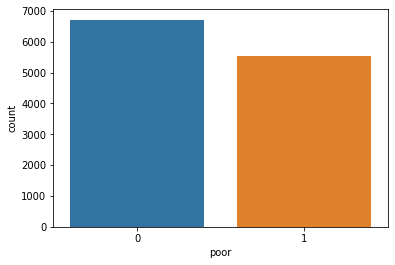

In [ ]:
sns.countplot(x="poor", data=mw_hh1)

plt.show()

In [ ]:
sns.jointplot("der_hhsize","own_530__Yes", data=mw_hh1,kind ="kde")

plt.show()

NameError: ignored

<class 'matplotlib.axes._subplots.AxesSubplot'>


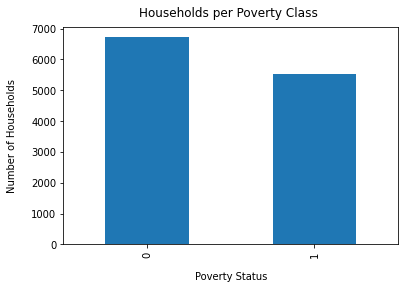

In [ ]:
print(type(mw_hh1['poor'].value_counts().plot(kind='bar'))) #set_xlabel("Number of Households").set_ylabel("Poverty Status")
plt.xlabel("Poverty Status", labelpad=14)
plt.ylabel("Number of Households", labelpad=14)
plt.title("Households per Poverty Class ", y=1.02);

#plot.set_xlabel(" Number of Households")
#plot.set_ylabel(" Poverty Status")
#plot.show()

In [ ]:
mw_hh1[["der_hhsize",
"hld_dwelloccu__Rented",
"hld_dwelloccu__Owned",
"own_530__Yes",
"hld_dwelloccu__Free, authorised",
"hld_toilet__Latrine without roof",
"hld_toiletshr__nan",
"hld_toilet__Traditional latrine with roof",
"cons_1335__Yes",
"hld_floor__Smoothed mud",
"hld_walls__Mud brick",
"cons_0114__Yes",
"own_529__Yes",
"hld_dwelloccu__Employer provides",
"wta_hh",
"own_503__Yes",
"cons_1338__Yes",
"hld_floor__Smooth cement",
"inc_102__Yes"]].describe()

,der_hhsize,hld_dwelloccu__Rented,hld_dwelloccu__Owned,own_530__Yes,"hld_dwelloccu__Free, authorised",hld_toilet__Latrine without roof,hld_toiletshr__nan,hld_toilet__Traditional latrine with roof,cons_1335__Yes,hld_floor__Smoothed mud,hld_walls__Mud brick,cons_0114__Yes,own_529__Yes,hld_dwelloccu__Employer provides,wta_hh,own_503__Yes,cons_1338__Yes,hld_floor__Smooth cement,inc_102__Yes
count,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000
mean,4.597354,0.121856,0.796145,0.027034,0.049249,0.193973,0.090738,0.637863,0.005309,0.728520,0.300637,0.019111,0.009719,0.029647,250.261468,0.336001,0.006697,0.251878,0.213411
std,2.221261,0.327132,0.402879,0.162188,0.216395,0.395424,0.287248,0.480638,0.072670,0.444741,0.458554,0.136922,0.098109,0.169619,173.313498,0.472359,0.081565,0.434110,0.409732
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.620400,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,128.255000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,210.696100,0.000000,0.000000,0.000000,0.000000
75%,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,336.460800,1.000000,0.000000,1.000000,0.000000
max,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1938.614300,1.000000,1.000000,1.000000,1.000000


In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
import ipywidgets as ipyw

In [ ]:
def get_html_table(target_df, title):
    df_style = target_df.style.set_table_attributes("style='border:2px solid;font-size:10px;margin:10px'").set_caption(title)
    return df_style._repr_html_()

df_2_html_table = get_html_table(mw_hh1[["der_hhsize",
"hld_dwelloccu__Rented",
"hld_dwelloccu__Owned",
"own_530__Yes",
"hld_dwelloccu__Free, authorised",
"hld_toilet__Latrine without roof",
"hld_toiletshr__nan",
"hld_toilet__Traditional latrine with roof",
"cons_1335__Yes",
"hld_floor__Smoothed mud",
"hld_walls__Mud brick",
"cons_0114__Yes",
"own_529__Yes",
"hld_dwelloccu__Employer provides",
"wta_hh",
"own_503__Yes",
"cons_1338__Yes",
"hld_floor__Smooth cement",
"inc_102__Yes"]].describe(), "The table showing Features")
#df_4_html_table = get_html_table(df_4, 'Data from Jira')
ipyw.HBox((ipyw.HTML(df_2_html_table))

SyntaxError: ignored

In [ ]:
#data = counts

In [ ]:
from pycaret.classification import *

In [ ]:
from pycaret.anomaly import *

In [ ]:
exp_100 = setup(data = data, target = "poor", session_id=123,
                  normalize = True,
                  transformation = True, 
                  ignore_low_variance = True,
                   sampling = False) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(11632, 486)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,481
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.870100,0.946600,0.863500,0.851700,0.857200,0.738000
1,CatBoost Classifier,0.867800,0.948200,0.857000,0.852100,0.854300,0.733400
2,Light Gradient Boosting Machine,0.861600,0.942600,0.845600,0.848100,0.846500,0.720500
3,Ridge Classifier,0.861200,0.000000,0.863800,0.835500,0.849000,0.720700
4,Linear Discriminant Analysis,0.860800,0.941200,0.863500,0.834900,0.848600,0.719900
5,Extreme Gradient Boosting,0.855900,0.937000,0.849400,0.834900,0.841900,0.709600
6,Gradient Boosting Classifier,0.855700,0.937500,0.839900,0.840900,0.840200,0.708600
7,Extra Trees Classifier,0.849800,0.930600,0.825800,0.839600,0.832400,0.696300
8,SVM - Linear Kernel,0.849700,0.000000,0.851000,0.832000,0.834700,0.697300
9,Ada Boost Classifier,0.849400,0.932800,0.829600,0.836100,0.832700,0.695800


In [ ]:
knn = create_model('knn')

In [ ]:
knn_df = assign_model(knn)

In [ ]:
exp_ano = setup(data)

TypeError: ignored

In [ ]:
tuned_knn = tune_model(model = 'knn', supervised_target = 'poor')

In [ ]:
knn_predictions = predict_model(knn, data = anomaly)

NameError: ignored

In [ ]:
exp_clf101 = setup(data = data, target = 'poor',pca_components = 10, session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(11632, 486)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,481
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
exp_clf102 = setup(data = data, target = 'poor', session_id=123,
                  normalize = True,
                  transformation = True, 
                  ignore_low_variance = True) 

NameError: ignored

In [ ]:
compare_models( )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.868500,0.949600,0.854600,0.854800,0.854400,0.734500
1,Light Gradient Boosting Machine,0.864000,0.945100,0.844000,0.853900,0.848700,0.725300
2,Ridge Classifier,0.861800,0.000000,0.858900,0.839500,0.848800,0.721600
3,Linear Discriminant Analysis,0.860700,0.940100,0.858700,0.837600,0.847800,0.719500
4,Gradient Boosting Classifier,0.855600,0.937400,0.840700,0.840100,0.840200,0.708400
5,Logistic Regression,0.853500,0.936500,0.852900,0.828600,0.840300,0.705000
6,Extreme Gradient Boosting,0.852600,0.937400,0.842900,0.833300,0.837900,0.702800
7,Ada Boost Classifier,0.850400,0.932000,0.831700,0.836900,0.834100,0.697900
8,Extra Trees Classifier,0.849100,0.930600,0.826900,0.837300,0.831900,0.694900
9,Random Forest Classifier,0.810100,0.892200,0.745600,0.818500,0.780000,0.613700


In [ ]:
catb = create_model('catboost')
plot_model(catb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8859,0.9592,0.8886,0.8628,0.8755,0.7702
1,0.8773,0.9518,0.8723,0.8583,0.8652,0.7526
2,0.8563,0.9417,0.8478,0.8365,0.8421,0.7102
3,0.8698,0.9542,0.8370,0.8701,0.8532,0.7363
4,0.8673,0.9461,0.8668,0.8439,0.8552,0.7328
5,0.8661,0.9519,0.8750,0.8364,0.8552,0.7308
6,0.8612,0.9455,0.8533,0.8418,0.8475,0.7201
7,0.8550,0.9456,0.8370,0.8415,0.8392,0.7072
8,0.8747,0.9521,0.8342,0.8822,0.8575,0.7459
9,0.8710,0.9481,0.8338,0.8743,0.8536,0.7384


SystemExit: ignored

In [ ]:
#this model is logistic regression _tunned
#model_lreg = create_model('lr', fold = 10)
tuned_log_reg = tune_model('lr',fold =10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8773,0.9504,0.8940,0.8436,0.8681,0.7536
1,0.8650,0.9475,0.8859,0.8274,0.8556,0.7292
2,0.8501,0.9387,0.8777,0.8075,0.8411,0.6998
3,0.8870,0.9535,0.8668,0.8812,0.8740,0.7715
4,0.8575,0.9402,0.8804,0.8182,0.8482,0.7142
5,0.8857,0.9520,0.9293,0.8362,0.8803,0.7716
6,0.8710,0.9422,0.8859,0.8380,0.8613,0.7409
7,0.8587,0.9444,0.8614,0.8320,0.8465,0.7157
8,0.8600,0.9493,0.8315,0.8547,0.8430,0.7166
9,0.8686,0.9455,0.8501,0.8571,0.8536,0.7343


In [ ]:
tuned_cat_boost= tune_model('catboost',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8748,0.9555,0.8641,0.8595,0.8618,0.7474
1,0.8712,0.9499,0.8696,0.8488,0.8591,0.7404
2,0.8575,0.9395,0.8560,0.8333,0.8445,0.7130
3,0.8673,0.9530,0.8424,0.8611,0.8516,0.7317
4,0.8649,0.9441,0.8723,0.8359,0.8537,0.7283
5,0.8710,0.9521,0.8832,0.8398,0.8609,0.7408
6,0.8624,0.9428,0.8505,0.8459,0.8482,0.7224
7,0.8526,0.9431,0.8342,0.8388,0.8365,0.7023
8,0.8747,0.9512,0.8451,0.8736,0.8591,0.7463
9,0.8710,0.9459,0.8392,0.8701,0.8544,0.7387


In [ ]:
plot_model(tuned_cat_boost,plot='auc')

SystemExit: ignored

In [ ]:
plot_model(estimator = tuned_cat_boost,plot='confusion_matrix')

SystemExit: ignored

In [ ]:
plot_model()

SystemExit: ignored

In [ ]:
plot_model(tuned_cat_boost,plot='confusion_matrix')

In [ ]:
#model_lgbm_ff = create_model('', fold = 5)
tuned_lgbm = tune_model('lightgbm', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8638,0.9478,0.8533,0.8464,0.8498,0.7252
1,0.8589,0.9387,0.8614,0.8320,0.8465,0.7160
2,0.8403,0.9375,0.8533,0.8051,0.8285,0.6793
3,0.8587,0.9390,0.8370,0.8485,0.8427,0.7145
4,0.8464,0.9326,0.8505,0.8172,0.8336,0.6911
5,0.8514,0.9414,0.8668,0.8159,0.8406,0.7016
6,0.8501,0.9333,0.8451,0.8271,0.8360,0.6980
7,0.8464,0.9318,0.8342,0.8275,0.8309,0.6902
8,0.8575,0.9317,0.8451,0.8405,0.8428,0.7125
9,0.8649,0.9369,0.8283,0.8661,0.8468,0.7260


In [ ]:
tuned_xgb = tune_model('xgboost', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8773,0.9494,0.8668,0.8622,0.8645,0.7524
1,0.8626,0.9454,0.8641,0.8368,0.8503,0.7233
2,0.8600,0.9352,0.8641,0.8325,0.8480,0.7182
3,0.8796,0.9483,0.8397,0.8879,0.8631,0.7558
4,0.8735,0.9466,0.8696,0.8533,0.8614,0.7450
5,0.8710,0.9461,0.8886,0.8363,0.8617,0.7410
6,0.8563,0.9409,0.8451,0.8383,0.8417,0.7101
7,0.8624,0.9408,0.8424,0.8516,0.8470,0.7220
8,0.8747,0.9467,0.8315,0.8844,0.8571,0.7457
9,0.8722,0.9446,0.8283,0.8812,0.8539,0.7406


In [ ]:
model_xgb_tuned_xgb = tune_model('xgboost', fold = 10)

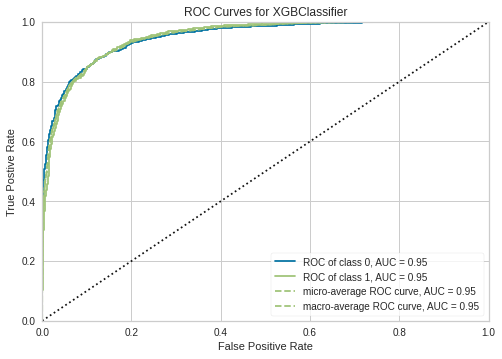

In [ ]:
plot_model(tuned_xgb,plot='auc')

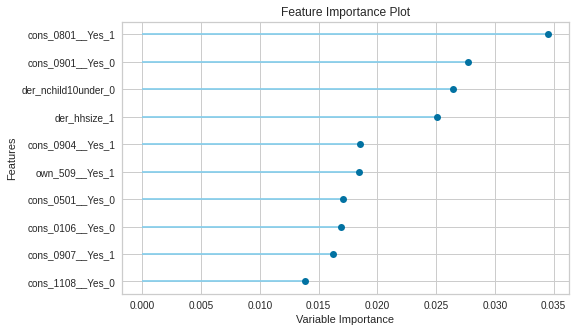

In [ ]:
plot_model(tuned_xgb,plot='feature')

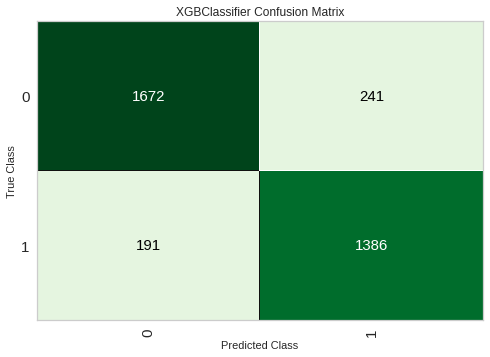

In [ ]:
plot_model(tuned_xgb,plot='confusion_matrix')

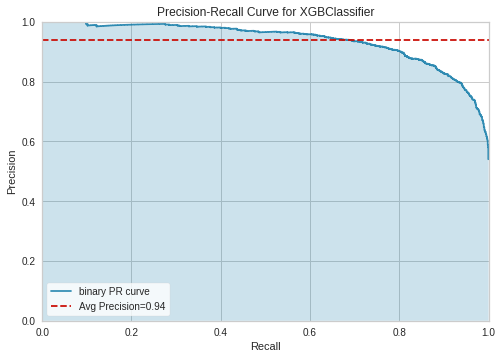

In [ ]:
plot_model(tuned_xgb,plot='pr')

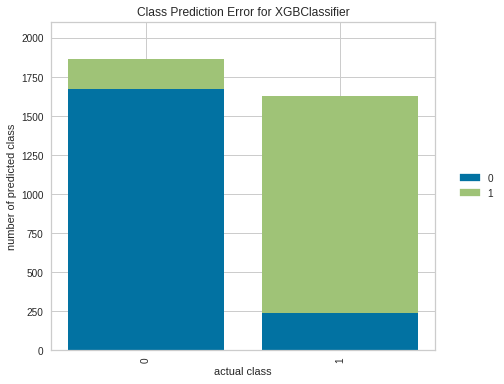

In [ ]:
plot_model(tuned_xgb,plot = 'error')

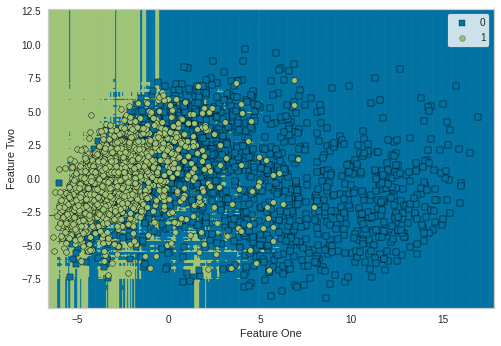

In [ ]:
plot_model(tuned_xgb,plot='boundary')

In [ ]:
#model_lgbm_ff = create_model('', fold = 5)
tuned_lgbm = tune_model( 'xgb', fold=10)

SystemExit: ignored

In [ ]:
model_lgbm_ff = create_model('lightgbm', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8847,0.9503,0.8723,0.8723,0.8723,0.7671
1,0.8638,0.9435,0.8587,0.8427,0.8506,0.7255
2,0.8575,0.9349,0.8560,0.8333,0.8445,0.7130
3,0.8636,0.9481,0.8370,0.8579,0.8473,0.7242
4,0.8575,0.9419,0.8560,0.8333,0.8445,0.7130
5,0.8698,0.9473,0.8886,0.8342,0.8605,0.7386
6,0.8563,0.9318,0.8342,0.8457,0.8399,0.7095
7,0.8526,0.9413,0.8315,0.8407,0.8361,0.7021
8,0.8563,0.9432,0.7989,0.8724,0.8340,0.7077
9,0.8538,0.9435,0.8229,0.8483,0.8354,0.7040


In [ ]:
plot_model()

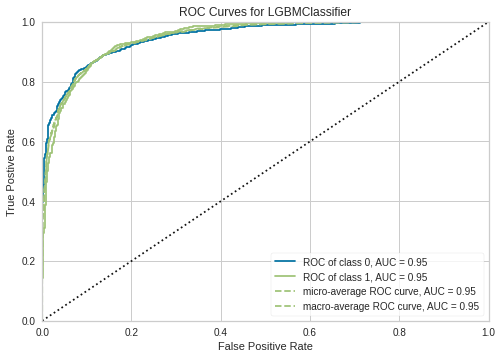

In [ ]:
plot_model(model_lgbm_ff,plot = 'auc')

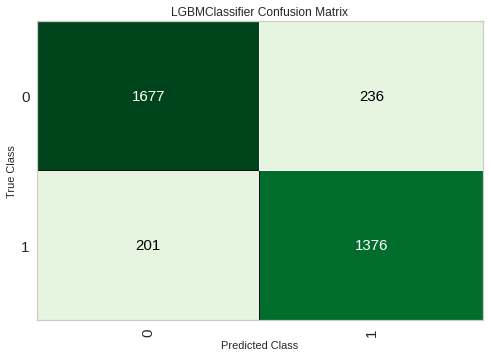

In [ ]:
plot_model(model_lgbm_ff,plot ="confusion_matrix")

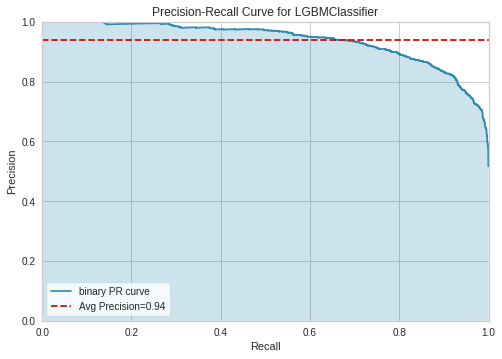

In [ ]:
plot_model(model_lgbm_ff,plot='pr',)

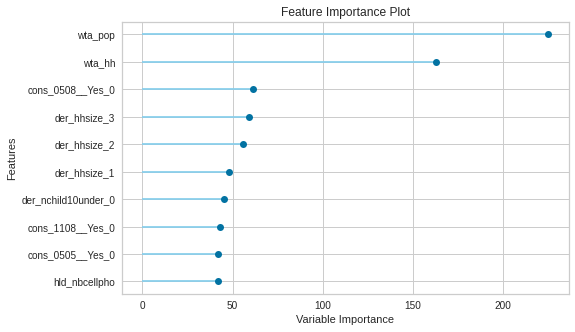

In [ ]:
plot_model(model_lgbm_ff,plot='feature')

In [ ]:
#model_lgbm_ff = create_model('', fold = 5)
tuned_lgbm = tune_model('lightgbm', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8761,0.9504,0.8614,0.8638,0.8626,0.7497
1,0.8663,0.9451,0.8614,0.8453,0.8533,0.7304
2,0.8673,0.9334,0.8696,0.8421,0.8556,0.7329
3,0.8722,0.9487,0.8424,0.8708,0.8564,0.7414
4,0.8624,0.9433,0.8614,0.8386,0.8499,0.7229
5,0.8526,0.9431,0.8696,0.8163,0.8421,0.7041
6,0.8563,0.9368,0.8533,0.8329,0.8430,0.7105
7,0.8501,0.9378,0.8315,0.8361,0.8338,0.6973
8,0.8649,0.9431,0.8152,0.8772,0.8451,0.7255
9,0.8686,0.9399,0.8338,0.8693,0.8512,0.7336


In [ ]:
#model_lgbm_ff = create_model('', fold = 5)
tuned_lgbm = tune_model('lightgbm', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8638,0.9478,0.8533,0.8464,0.8498,0.7252
1,0.8589,0.9387,0.8614,0.8320,0.8465,0.7160
2,0.8403,0.9375,0.8533,0.8051,0.8285,0.6793
3,0.8587,0.9390,0.8370,0.8485,0.8427,0.7145
4,0.8464,0.9326,0.8505,0.8172,0.8336,0.6911
5,0.8514,0.9414,0.8668,0.8159,0.8406,0.7016
6,0.8501,0.9333,0.8451,0.8271,0.8360,0.6980
7,0.8464,0.9318,0.8342,0.8275,0.8309,0.6902
8,0.8575,0.9317,0.8451,0.8405,0.8428,0.7125
9,0.8649,0.9369,0.8283,0.8661,0.8468,0.7260


In [ ]:
#model_lgbm_ff = create_model('', fold = 5)
tuned_lgbm = tune_model('lightgbm', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8638,0.9478,0.8533,0.8464,0.8498,0.7252
1,0.8589,0.9387,0.8614,0.8320,0.8465,0.7160
2,0.8403,0.9375,0.8533,0.8051,0.8285,0.6793
3,0.8587,0.9390,0.8370,0.8485,0.8427,0.7145
4,0.8464,0.9326,0.8505,0.8172,0.8336,0.6911
5,0.8514,0.9414,0.8668,0.8159,0.8406,0.7016
6,0.8501,0.9333,0.8451,0.8271,0.8360,0.6980
7,0.8464,0.9318,0.8342,0.8275,0.8309,0.6902
8,0.8575,0.9317,0.8451,0.8405,0.8428,0.7125
9,0.8649,0.9369,0.8283,0.8661,0.8468,0.7260


In [ ]:
#model_lgbm_ff = create_model('', fold = 5)
tuned_lgbm = tune_model('lightgbm', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8638,0.9478,0.8533,0.8464,0.8498,0.7252
1,0.8589,0.9387,0.8614,0.8320,0.8465,0.7160
2,0.8403,0.9375,0.8533,0.8051,0.8285,0.6793
3,0.8587,0.9390,0.8370,0.8485,0.8427,0.7145
4,0.8464,0.9326,0.8505,0.8172,0.8336,0.6911
5,0.8514,0.9414,0.8668,0.8159,0.8406,0.7016
6,0.8501,0.9333,0.8451,0.8271,0.8360,0.6980
7,0.8464,0.9318,0.8342,0.8275,0.8309,0.6902
8,0.8575,0.9317,0.8451,0.8405,0.8428,0.7125
9,0.8649,0.9369,0.8283,0.8661,0.8468,0.7260


In [ ]:
data['poor']


0        0
1        0
2        0
3        1
4        1
        ..
11627    0
11628    0
11629    1
11630    1
11631    1
Name: poor, Length: 11632, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier




In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn import ensemble

In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 15.1MB/s 


In [ ]:
import eli5

Using TensorFlow backend.


In [ ]:
train_data = data.drop('poor', axis=1)
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data.select_dtypes(include=['object']).columns
X = train_data
y = data['poor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
#pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                     ('classifier',LinearDiscriminantAnalysis())])
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',GaussianNB())])
    
model = pipe.fit(X_train, y_train)

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',LinearSVC(class_weight='balanced', random_state=0))])
    
model = pipe.fit(X_train, y_train)

In [ ]:
target_names = y_test.unique().astype(str)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.34      0.50      1237
           1       0.56      0.97      0.71      1090

    accuracy                           0.64      2327
   macro avg       0.74      0.65      0.61      2327
weighted avg       0.75      0.64      0.60      2327



In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
#model, scoring= None,random_state=1).fit(x_test, y_test)
perm = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=42)        
expl = eli5.explain_weights(perm, feature_names=X_test.columns.tolist(), top=50)

In [ ]:
print(eli5.format_as_text(expl))        
print(expl.feature_importances)
# save importances to html 
text_file = open("importance.html", "w")        
text_file.write(eli5.format_as_html(expl))        
text_file.close()

In [ ]:
eli5.explain_weights(model.named_steps['classifier'], top=100, feature_names=X_train.columns.tolist())  #model.named_steps['classifier']

Weight?,Feature
+3.447,der_hhsize
+0.580,hld_dwelloccu__Rented
+0.468,hld_dwelloccu__Owned
+0.446,own_530__Yes
+0.300,"hld_dwelloccu__Free, authorised"
+0.259,hld_toilet__Latrine without roof
+0.256,hld_toiletshr__nan
+0.255,hld_toilet__Traditional latrine with roof
+0.244,cons_1335__Yes
+0.225,hld_floor__Smoothed mud


In [ ]:
plot_model(expl,plot='feature')

SystemExit: ignored

In [ ]:
"""
onehot_columns = list(pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['one_hot'].get_feature_names(input_features=categorical_features))
numeric_features_list = list(numeric_features)
numeric_features_list.extend(onehot_columns)

"""
onehot_columns = list(pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['one_hot'].get_feature_names(input_features=categorical_features))
numeric_features_list = list(numeric_features)
numeric_features_list.extend(onehot_columns)

In [ ]:
eli5.explain_weights(pipe.named_steps['classifier'], top=50, feature_names=numeric_features_list)

NameError: ignored

In [ ]:
#model_lgbm1 = create_model('catboost', fold = 5)
tuned_lr = tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8638,0.9478,0.8533,0.8464,0.8498,0.7252
1,0.8589,0.9387,0.8614,0.8320,0.8465,0.7160
2,0.8403,0.9375,0.8533,0.8051,0.8285,0.6793
3,0.8587,0.9390,0.8370,0.8485,0.8427,0.7145
4,0.8464,0.9326,0.8505,0.8172,0.8336,0.6911
5,0.8514,0.9414,0.8668,0.8159,0.8406,0.7016
6,0.8501,0.9333,0.8451,0.8271,0.8360,0.6980
7,0.8464,0.9318,0.8342,0.8275,0.8309,0.6902
8,0.8575,0.9317,0.8451,0.8405,0.8428,0.7125
9,0.8649,0.9369,0.8283,0.8661,0.8468,0.7260


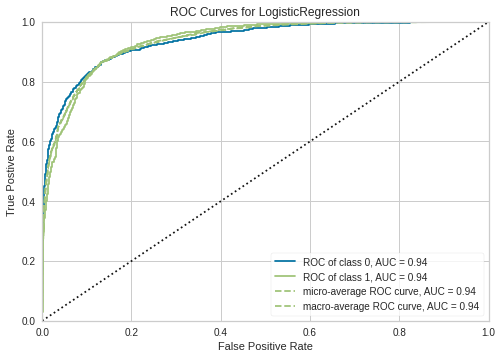

In [ ]:
plot_model(tuned_lr)

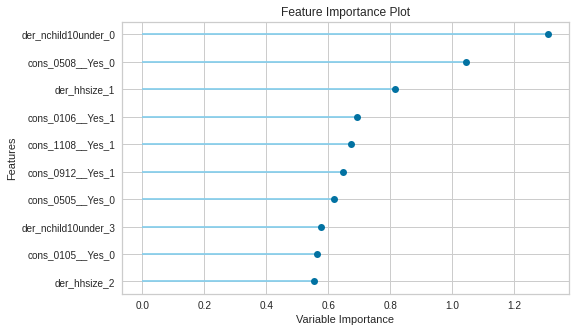

In [ ]:
plot_model(tuned_lr,plot='feature')

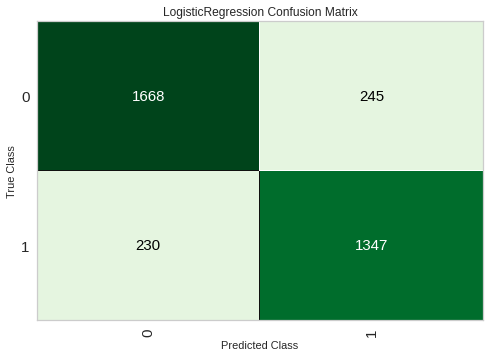

In [ ]:
plot_model(tuned_lr,plot=('confusion_matrix'))

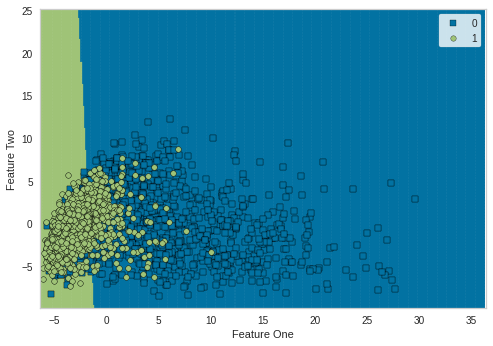

In [ ]:
plot_model(tuned_lr,plot=('boundary'))

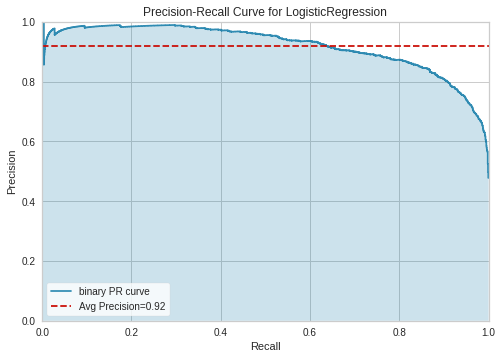

In [ ]:
plot_model(tuned_lr,plot=('pr'))

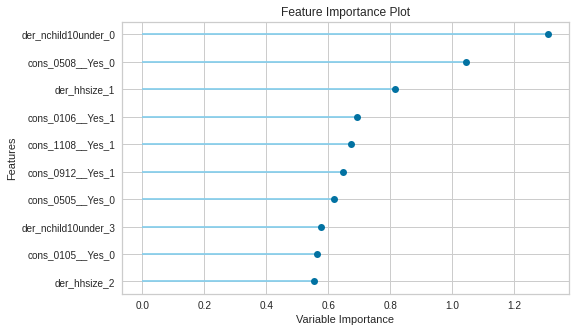

In [ ]:
plot_model(tuned_lr,plot=('feature'))

In [ ]:
lot_model(tuned_lr,plot=('feature'))

NameError: ignored

In [ ]:
plot_model(model_lgbm_true,plot=('parameter'))

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0
n_estimators,100


In [ ]:
evaluate_model(model_lgbm_true)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

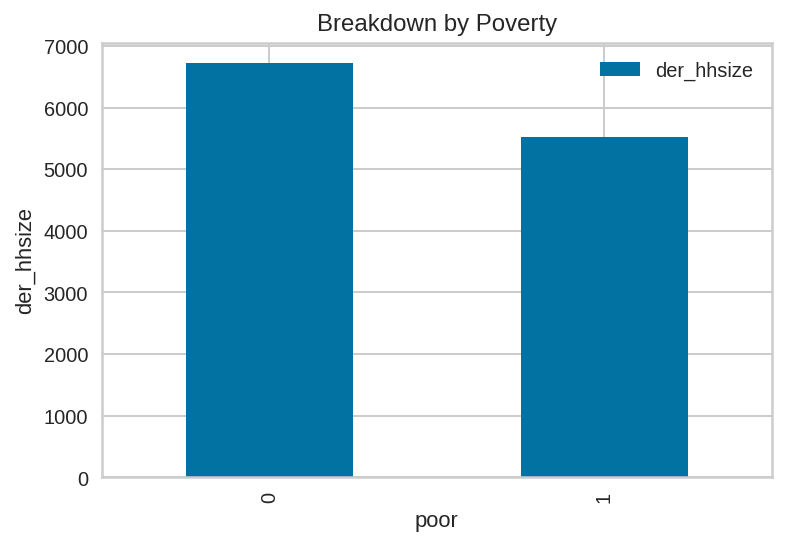

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
mw_hh1[['poor','der_hhsize']].groupby('poor').count().plot(kind='bar',title = 'Breakdown by Poverty')
plt.xlabel('poor')
plt.ylabel('der_hhsize')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


In [ ]:

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="poor", y="der_hhsize", data=mw_hh1,
            label="Poor", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="poor", y="der_hhsize", data=mw_hh1,
            label="poverty", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="poverty per householdsize")
sns.despine(left=True, bottom=True)


'\ncmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)\nax = sns.scatterplot(x="poor", y="wta_pop",\n                     hue="poor", size="wta_hh",\n                     palette=cmap, sizes=(10, 200),\n                     data=mw_hh1)\n'

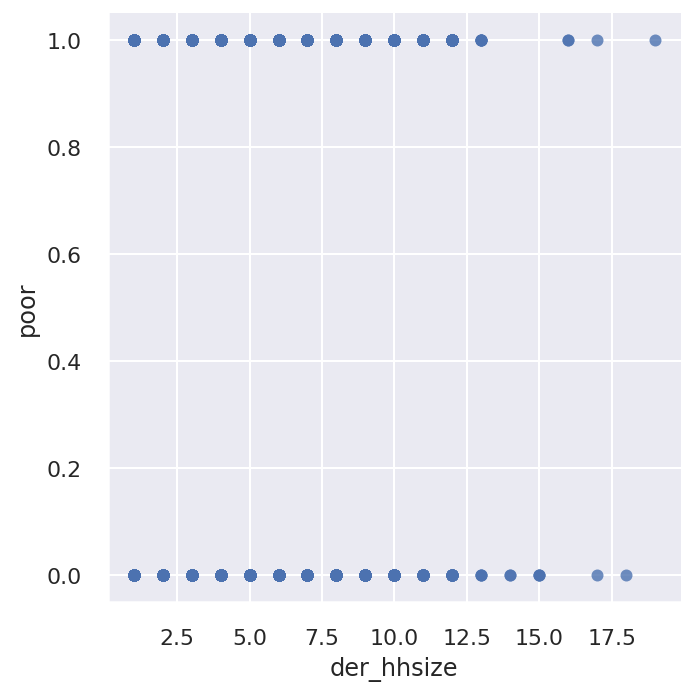

In [ ]:
sns.set()

# Load the example planets dataset

sns.lmplot('der_hhsize', 'poor', data=mw_hh1, fit_reg=False)

#sns.lmplot('x', 'y', data=df, fit_reg=False)






"""
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="poor", y="wta_pop",
                     hue="poor", size="wta_hh",
                     palette=cmap, sizes=(10, 200),
                     data=mw_hh1)
"""

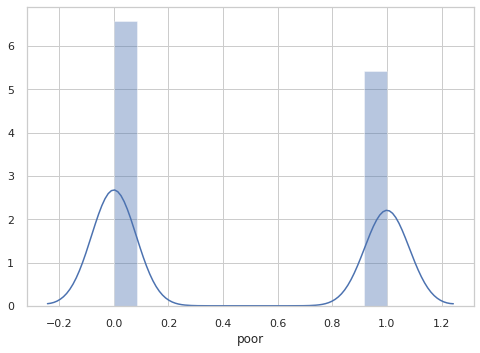

In [ ]:
sns.distplot(data.poor)

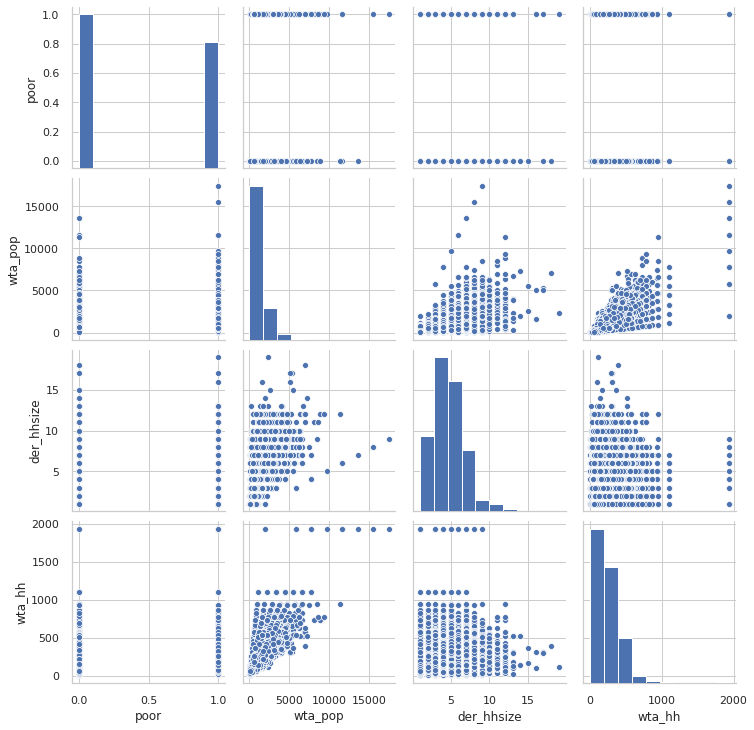

In [ ]:
sns.pairplot(data, vars=['poor','wta_pop','der_hhsize','wta_hh'], dropna=True, palette='husl');

In [ ]:
import numpy as np


In [ ]:
# Create correlation matrix
mw_hh2 = mw_hh1
corr_matrix = mw_hh2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

In [ ]:
print(to_drop)
#df.drop(df[to_drop], axis=1)

['hld_toiletshr__nan', 'hld_credit2__nan', 'com_distclinic__nan']


In [ ]:
mw_hh2.shape

(12244, 486)

In [ ]:
X = mw_hh2.drop(mw_hh2[to_drop],axis=1)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)
selector.support_


selector.ranking_

In [ ]:
import eli5 
from eli5.sklearn import PermutationImportancefrom lightgbm import LGBMClassifier
# set data and targets, split, and metric
# set a classifier
clf = LGBMClassifier(**best_params)
# fit the classifier model
clf.fit(x_train, y_train, 
        eval_set=[(x_train, y_train), (x_valid, y_valid)],
        eval_metric=lgbm_multi_weighted_logloss, 
        verbose=100,
        early_stopping_rounds=400, 
        sample_weight=y_train.map(weights), )
# calculate permitation importance for the classifier
perm = PermutationImportance(
           clf, scoring=permutation_scorer, 
           random_state=1).fit(x_valid, y_valid)        
expl = eli5.explain_weights(
           perm, feature_names=x_valid.columns.tolist(), top=None)        print(eli5.format_as_text(expl))        print(expl.feature_importances)
# save importances to html 
text_file = open("importance.html", "w")        text_file.write(eli5.format_as_html(expl))        
text_file.close()

In [ ]:
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
x_std = sc.fit_transform(X)

In [ ]:
y_std = X.loc[:,['poor']].values

In [ ]:
y_std.shape

(12244, 1)

In [ ]:
x_std.shape

NameError: ignored

In [ ]:
# Create a pca object with the 2 components as a parameter
pca = decomposition.PCA(n_components=2)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

In [ ]:
X_std_pca.shape

(12244, 2)

In [ ]:
type(X_std_pca)

numpy.ndarray

In [ ]:
df_1 = pd.DataFrame(data=X_std_pca)

In [ ]:
df_y = pd.DataFrame(data = y_std)

In [ ]:
list(df_y.columns)

[0]

In [ ]:
df_poor = df_y.columns

In [ ]:

df_1 = df_1.join(df_poor)

AttributeError: ignored

In [ ]:
df_1.shape

In [ ]:
data = df_1.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = df_1.drop(data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (11632, 2)
Unseen Data For Predictions: (612, 2)


In [ ]:
exp_clf101 = setup(data = data, target = 'poor' ,pca_components = 10, session_id=123)

TypeError: ignored